In [1]:
#data analysis
# Below, we will gather a list of random cities across the world based on their latitude and longitude and observe
#weather patterns in each. You will see that (1) The relationship between temperature and latitude is very strong because
#as we get further away from the equator, the earth moves further from the sun which causes temperatures to reduce. 
#(2)Right now, it is winter in the northern hemisphere and summer in the southern, so the relationship is stronger in 
#the northen hemisphere. (3) similar observations can be made about cloudiness and humidity, though the relationship is
#not as strong. Over all, we can see that as we move away from the equator a decrease in temperature occurs, while all
#relationships between hemispheres seem to be inverse.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#a list to store city data
city_data = []

print('Beginning Data Retrieval\n-----------------------------\n')

rcd = 0 
sets = 1
for city in cities:
    #create a list of cities from 1-50 within another index
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
    
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&clouds.value&units=imperial&appid={weather_api_key}"
    weather = requests.get(query_url).json()
    
    #grabe city data from each response
    try:
        city_data.append({
            'City': city,
            'Lat': weather['coord']['lat'],
            'Lng': weather["coord"]['lon'],
            'Temp': weather["main"]["temp_max"],
            'Humidity': weather["main"]["humidity"],
            'Cloudiness': weather["clouds"]["all"],
            'Wind': weather["wind"]["speed"],
            'Country': weather["sys"]["country"],
            'Date': weather["dt"]
        })
    except:
        print('City not found. Skipping...')
        pass

print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | tiruvidaimarudur
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | port-cartier
Processing Record 10 of Set 1 | ambilobe
Processing Record 11 of Set 1 | yar-sale
Processing Record 12 of Set 1 | aquiraz
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | jocotan
Processing Record 18 of Set 1 | sao luis
Processing Record 19 of Set 1 | pemangkat
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | port macquarie
Processing Record 22 of Set 1 | misawa
Processin

Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | nauta
Processing Record 44 of Set 4 | saquarema
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | simdega
Processing Record 47 of Set 4 | ruston
Processing Record 48 of Set 4 | huaihua
Processing Record 49 of Set 4 | bacuit
City not found. Skipping...
Processing Record 50 of Set 4 | broken hill
Processing Record 1 of Set 5 | ucluelet
Processing Record 2 of Set 5 | abonnema
Processing Record 3 of Set 5 | bodden town
Processing Record 4 of Set 5 | westport
Processing Record 5 of Set 5 | yaan
Processing Record 6 of Set 5 | muros
Processing Record 7 of Set 5 | olkhovatka
Processing Record 8 of Set 5 | indramayu
Processing Record 9 of Set 5 | kapaa
Processing Record 10 of Set 5 | coahuayana
Processing Record 11 of Set 5 | port hawkesbury
Processing Record 12 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 5 | new deer
Processing Record 14 of Set 5 | mwense
P

Processing Record 31 of Set 8 | panguna
Processing Record 32 of Set 8 | harindanga
Processing Record 33 of Set 8 | te anau
Processing Record 34 of Set 8 | katangli
Processing Record 35 of Set 8 | cherskiy
Processing Record 36 of Set 8 | vostok
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | fagersta
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | camacha
Processing Record 41 of Set 8 | chernyshevskiy
Processing Record 42 of Set 8 | vestmannaeyjar
Processing Record 43 of Set 8 | koygorodok
Processing Record 44 of Set 8 | yakshur-bodya
City not found. Skipping...
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | hare bay
Processing Record 47 of Set 8 | saint-francois
Processing Record 48 of Set 8 | hvide sande
Processing Record 49 of Set 8 | geraldton
Processing Record 50 of Set 8 | kaeo
Processing Record 1 of Set 9 | awka
Processing Record 2 of Set 9 | seduva
Processing Record 3 of Set 9 | namatanai
Processing Record 4 o

Processing Record 20 of Set 12 | kalmunai
Processing Record 21 of Set 12 | tacuarembo
Processing Record 22 of Set 12 | bridgton
Processing Record 23 of Set 12 | ornskoldsvik
Processing Record 24 of Set 12 | taga
Processing Record 25 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 26 of Set 12 | ulladulla
Processing Record 27 of Set 12 | itarema
Processing Record 28 of Set 12 | san quintin
Processing Record 29 of Set 12 | ostersund
Processing Record 30 of Set 12 | smithers
Processing Record 31 of Set 12 | kilindoni
Processing Record 32 of Set 12 | naftah
City not found. Skipping...
Processing Record 33 of Set 12 | altay
Processing Record 34 of Set 12 | mecca
Processing Record 35 of Set 12 | tabas
Processing Record 36 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 12 | sinnamary
Processing Record 38 of Set 12 | goreloye
Processing Record 39 of Set 12 | lamar
Processing Record 40 of Set 12 | xadani
City not found. Skipping...
Processing Record 41 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame(city_data)
df.to_csv(output_data_file)
df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,vila velha,-20.3297,-40.2925,86.00,66,20,12.66,BR,1612639871
1,albany,42.6001,-73.9662,37.40,35,75,13.80,US,1612639930
2,tiruvidaimarudur,10.9960,79.4521,68.00,89,0,7.40,IN,1612639930
3,ushuaia,-54.8000,-68.3000,55.40,67,20,21.85,AR,1612639930
4,bethel,41.3712,-73.4140,42.80,31,40,13.80,US,1612639660
...,...,...,...,...,...,...,...,...,...
558,san vicente,-26.6167,-54.1333,79.93,37,0,6.53,AR,1612639994
559,tessalit,20.1986,1.0114,75.96,17,71,9.46,ML,1612639994
560,chara,56.9064,118.2631,-14.46,73,100,0.54,RU,1612639705
561,buin,-33.7333,-70.7500,71.60,60,0,8.05,CL,1612639994


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
df.describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.581279,18.809774,49.747886,72.319716,50.202487,8.541297,1.612640e+09
std,34.301004,90.746315,32.635679,20.035309,40.526010,6.063905,8.955314e+01
min,-54.800000,-179.166700,-40.540000,15.000000,0.000000,0.110000,1.612640e+09
25%,-8.328350,-62.241700,28.000000,61.500000,1.000000,4.000000,1.612640e+09
50%,23.400000,20.225100,60.530000,78.000000,48.000000,6.980000,1.612640e+09
75%,49.466650,102.389850,76.235000,87.000000,90.000000,11.565000,1.612640e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,44.870000,1.612640e+09


## Latitude vs. Temperature Plot

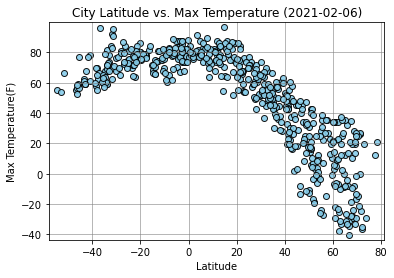

In [6]:
plt.scatter(df["Lat"], df["Temp"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

curr_date = pd.to_datetime('today').date()

plt.xlim(df["Lat"].min()-3, df["Lat"].max()+3)
plt.ylim(df["Temp"].min()-3, df["Temp"].max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_temp.png')

## Latitude vs. Humidity Plot

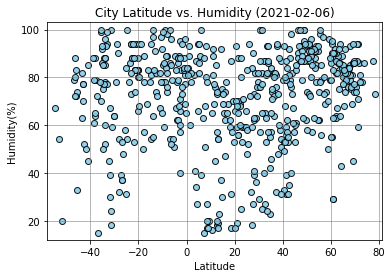

In [7]:
plt.scatter(df["Lat"], df["Humidity"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-3, df["Lat"].max()+3)
plt.ylim(df["Humidity"].min()-3, df["Humidity"].max()+3)

plt.title(f"City Latitude vs. Humidity ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_hum.png')

## Latitude vs. Cloudiness Plot

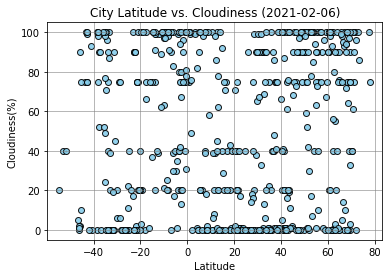

In [8]:
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-5, df["Lat"].max()+5)
plt.ylim(df["Cloudiness"].min()-5, df["Cloudiness"].max()+5)

plt.title(f"City Latitude vs. Cloudiness ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_cloud.png')

## Latitude vs. Wind Speed Plot

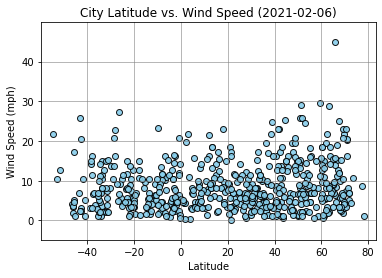

In [9]:
plt.scatter(df["Lat"], df["Wind"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-5, df["Lat"].max()+5)
plt.ylim(df["Wind"].min()-5, df["Wind"].max()+5)

plt.title(f"City Latitude vs. Wind Speed ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_wind.png')

## Linear Regression

In [10]:
north_hem_df = df.loc[df["Lat"] >=0]
south_hem_df = df.loc[df["Lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.7502150090480483


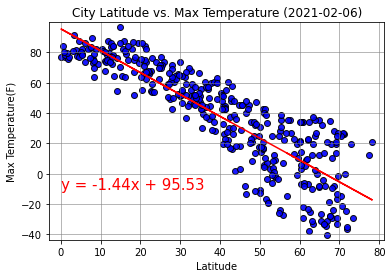

In [11]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,-10), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_temp_N.png')

print(f'the r-value is: {rvalue}')
#this is the strongest relationship observed in this study. Since it is currently winter in the northern hemisphere
#, we can assume that temperatures decrease drastically as we move away from the equator due to more extreme temperatures
# in the north.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.30260741053157447


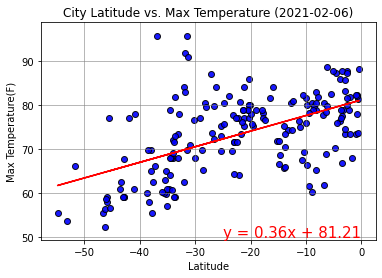

In [12]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r")

plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_temp_S.png')

print(f'the r-value is: {rvalue**2}')
#this is the strongest relationship observed in the southern hemisphere. Since it is currently summer, we can 
#assume that temperatures decrease gradually as we move away from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.12804250039769352


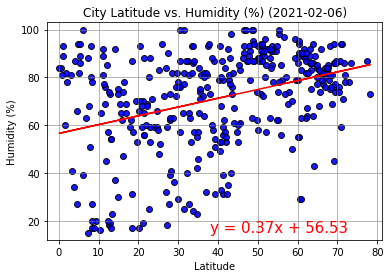

In [13]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(38,15), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Humidity (%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_hum_N.png')

print(f'the r-value is: {rvalue**2}')
#The r-value shows the strength of relationship between latitude and humidity. We generally associate snow with winter
#and tend to see more snow in as we move further from the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.043040862012397756


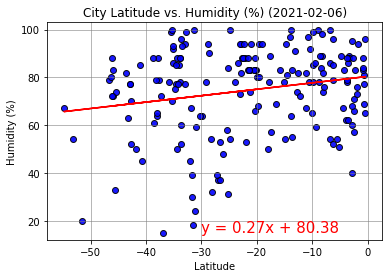

In [14]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-30,15), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Humidity (%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_hum_S.png')

print(f'the r-value is: {rvalue**2}')
# The r-value shows the strength of relationship between latitude and humidity. Again, due to the fact that it is 
#summer in the southern hemisphere right now, the relationship is not as strong between these variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.06821225380068428


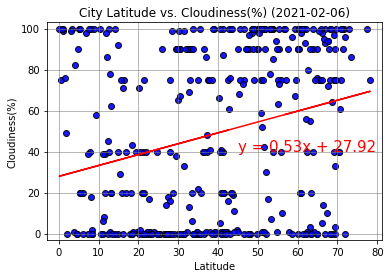

In [15]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,40), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Cloudiness(%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_cloud_N.png')

print(f'the r-value is: {rvalue**2}')
# The r-value shows the strength of relationship between latitude and cloudiness. This may be caused by snowy
#conditions in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.05617975902485685


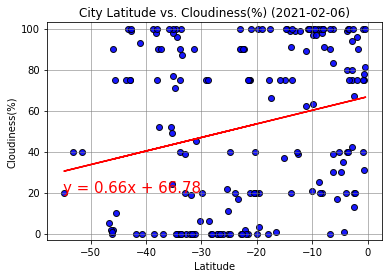

In [16]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Cloudiness(%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_cloud_S.png')

print(f'the r-value is: {rvalue**2}')
#in comparison to the last illustration, the regression line is lower on the plot meaning averall fewer clouds. The r-value
#is also lower, probably due to it being summer and more clear skies.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.02257357677946461


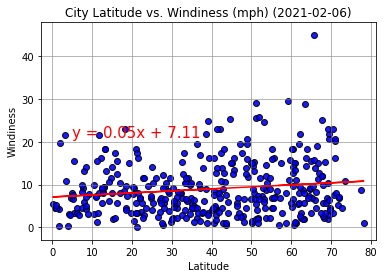

In [17]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5,21), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Windiness (mph) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Windiness")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_wind_N.png')

print(f'the r-value is: {rvalue**2}')

#the relationship between latitude and windiness in the northern hemisphere is week and we can not therefore 
#make any strong assumptions or predictions. it may be just as windy in the Gulf of Mexico as it is in Nova Scotia.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.004534623206870739


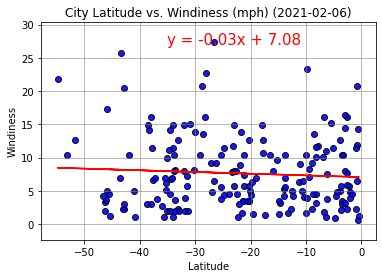

In [18]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-35,27), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Windiness (mph) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Windiness")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_wind_S.png')

print(f'the r-value is: {rvalue**2}')
#The relationship between to the two variables is rather weak, however we can see a slight increase in windiness as we 
#move further from the equator.

NameError: name 'df' is not defined